## Students t test for nose heights
* Determine if nose heights for no wind farm LLJs are statistically different than for wind farm parametrizations. Here, I combine data from vw-centroid, sw corner of vw, ne buoy, se buoy, southern la

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats

In [4]:
vwcent_nwf = pd.read_csv('LLJ_data/NWF_vwcent.csv')
nebuoy_nwf = pd.read_csv('LLJ_data/NWF_nebuoy.csv')
southcent_nwf = pd.read_csv('LLJ_data/NWF_southcent.csv')
swbuoy_nwf = pd.read_csv('LLJ_data/NWF_swbuoy.csv')
swcorner_nwf = pd.read_csv('LLJ_data/NWF_swcorner.csv')

vwcent_wf = pd.read_csv('LLJ_data/VW100_vwcent.csv')
nebuoy_wf = pd.read_csv('LLJ_data/CA100_nebuoy.csv')
southcent_wf = pd.read_csv('LLJ_data/LA100_southcent.csv')
swbuoy_wf = pd.read_csv('LLJ_data/CA100_swbuoy.csv')
swcorner_wf = pd.read_csv('LLJ_data/VW100_swcorner.csv')

nwf = pd.concat([vwcent_nwf, nebuoy_nwf, southcent_nwf, swbuoy_nwf, swcorner_nwf])
wf = pd.concat([vwcent_wf, nebuoy_wf, southcent_wf, swbuoy_wf, swcorner_wf])

In [8]:
nwf = nwf['Nose height (meters)'].dropna()
wf = wf['Nose height (meters)'].dropna()

In [10]:
len(nwf), len(wf)

(3209, 1864)

### data exploration

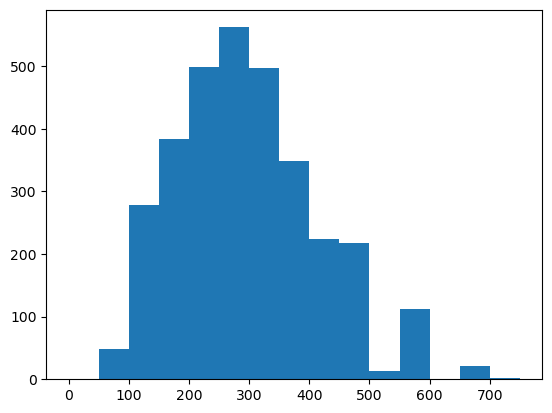

In [19]:
plt.hist(nwf, bins=np.arange(0, 800, 50));

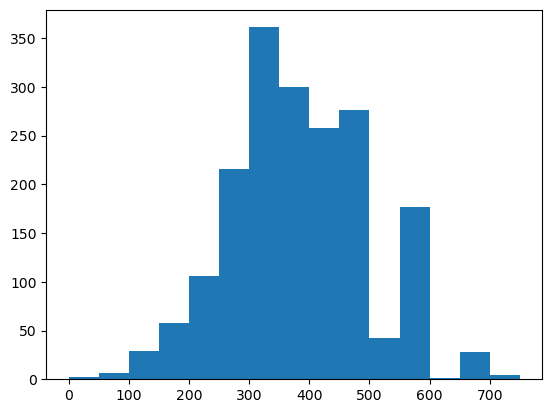

In [22]:
plt.hist(wf, bins=np.arange(0, 800, 50));

In [26]:
statistics.variance(nwf), statistics.variance(wf), statistics.variance(nwf)/statistics.variance(wf)

(13588.14099201066, 13130.806733338593, 1.0348291059307813)

In [30]:
nwf.mean(), wf.mean()

(294.38310351777426, 382.0929848196169)

### t-test
* We will use a two-sample t-test because there are two groups of samples and we want to compare them to find whether they belong to the same population
* null hypothesis: the means of nwf and wf are equal
* alternative hypothesis: the mean of the nwf sample is less than the mean of the wf sample
* use alpha=0.05

In [29]:
stats.ttest_ind(a=nwf, b=wf, equal_var=True, alternative='less')

Ttest_indResult(statistic=-25.998341189723163, pvalue=2.695845039301163e-140)

#### analysis of results
* the p-value is much smaller than alpha=0.05, so we can reject the null hypothesis that the mean of the nwf nose heights is equal to the mean nose height for the wf nose heights

## Summary

* In this analysis I compared the nose heights for both nwf and wf simulations to determine if their means are different using a two-sample t-test. There were 3209 values in the nwf sample and 1864 values in the wf sample. The mean of the nwf sample was 294, and the mean of the wf sample was 382. Both samples had similar variances, and approximately normal distributions, so the t-test was appropriate. For a t-test with a null hypothesis that the two means are equal, I found a p-value of 2.7e-140, which is much lower than the threshold value of 0.05, so I can confidently reject the null hypothesis. When analyzing each location independently, the null hypothesis can be rejected for each location. 

### Further analysis for each location:

In [31]:
nwf_list = [vwcent_nwf, nebuoy_nwf, southcent_nwf, swbuoy_nwf, swcorner_nwf]
wf_list = [vwcent_wf, nebuoy_wf, southcent_wf, swbuoy_wf, swcorner_wf]

In [33]:
loc_names = ['vw-cent', 'nebuoy', 'southern_la_centroid', 'swbuoy', 'swcorner_vwinds']
for i in range(len(nwf_list)):
    nwf_i = nwf_list[i]['Nose height (meters)'].dropna()
    wf_i = wf_list[i]['Nose height (meters)'].dropna()
    
    print(loc_names[i])
    print('sample sizes: ', len(nwf_i), len(wf_i))
    print('Means: ', nwf_i.mean(), wf_i.mean())
    print('Variance: ', statistics.variance(nwf_i), statistics.variance(wf_i), statistics.variance(nwf_i)/statistics.variance(wf_i))
    print("t-test:")
    print(stats.ttest_ind(a=nwf_i, b=wf_i, equal_var=True, alternative='less'))
    print('-----------------------')

vw-cent
sample sizes:  829 552
Means:  313.11749863020617 414.2732027164404
Variance:  14706.270469251585 9225.956808273086 1.5940103313798522
t-test:
Ttest_indResult(statistic=-16.45880799584012, pvalue=5.1964828650729245e-56)
-----------------------
nebuoy
sample sizes:  756 94
Means:  284.80445194244385 476.49992954984623
Variance:  12002.23729132346 8011.011048671099 1.4982175431295206
t-test:
Ttest_indResult(statistic=-16.29909226978092, pvalue=1.8316544612243557e-52)
-----------------------
southern_la_centroid
sample sizes:  737 471
Means:  270.4788341185778 360.4571670564623
Variance:  13120.348080473645 10688.619796180248 1.2275062946071311
t-test:
Ttest_indResult(statistic=-13.82470694685897, pvalue=9.244743336043003e-41)
-----------------------
swbuoy
sample sizes:  97 70
Means:  240.8569636394068 459.54482220241
Variance:  5008.616163714777 11159.186186779189 0.4488334614981798
t-test:
Ttest_indResult(statistic=-16.015756227029627, pvalue=9.86173953441279e-36)
-------------